<a href="https://colab.research.google.com/github/olodenm/info_2022_olo/blob/Netology_HW/HR_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import itertools

Файл доступен [тут](https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing)


#### Признаки:
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты


In [3]:
!gdown --id 1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1
To: /content/HR.csv
100% 567k/567k [00:00<00:00, 102MB/s]


###№1
Загрузите файл HR.csv в pandas dataframe

In [4]:
df = pd.read_csv('/content/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


###№2
Рассчитайте основные статистики для переменных

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


###№3
Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [6]:
df.info() # department, salary категориальные данные, они в расчете кореляции не учавствуют

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<ipython-input-7-ef3c0f12309f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matx = df.corr()


Text(0.5, 1.0, 'Корреляционная матрица')

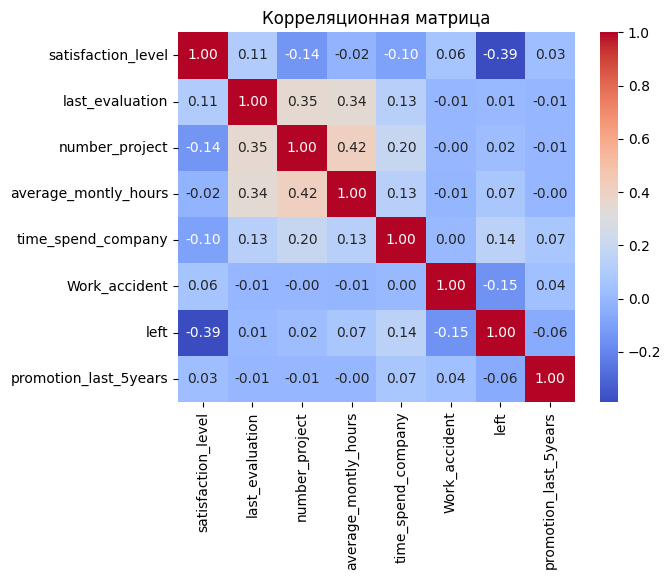

In [7]:
# корреляция
corr_matx = df.corr()

# визуализация
sns.heatmap(corr_matx, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')

In [9]:
# Получение абсолютных значений корреляций
abs_correlations = corr_matx.abs()

# Выбор двух самых скоррелированных переменных
max_corr_variables = abs_correlations.unstack().sort_values(ascending=False).drop_duplicates()
most_correlated_vars = max_corr_variables[max_corr_variables < 1].head(2)
print(f'\tСамые скоррелированные переменные: \n{most_correlated_vars}')

# Выбор двух наименее скоррелированных переменных
min_corr_variables = abs_correlations.unstack().sort_values().drop_duplicates()
least_correlated_vars = min_corr_variables.head(2)
print(f'\n\tНаименее скоррелированные переменные: \n{least_correlated_vars}')

	Самые скоррелированные переменные: 
number_project      average_montly_hours    0.417211
satisfaction_level  left                    0.388375
dtype: float64

	Наименее скоррелированные переменные: 
Work_accident         time_spend_company       0.002120
average_montly_hours  promotion_last_5years    0.003544
dtype: float64


### №4
Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [11]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### №5
Показать распределение сотрудников по зарплатам.

Text(0, 0.5, 'Количество сотрудников')

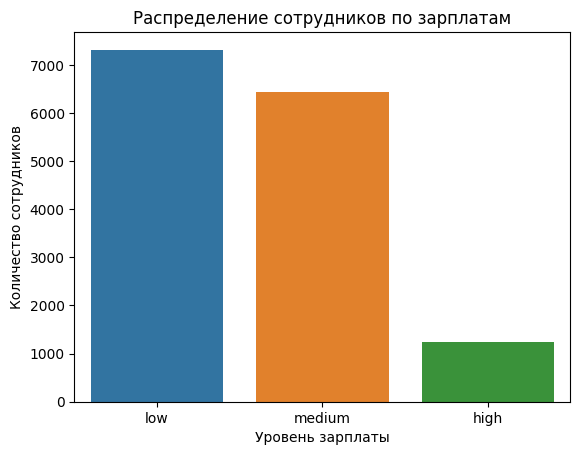

In [12]:
sns.countplot(x='salary', data=df)
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')

### №6
Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

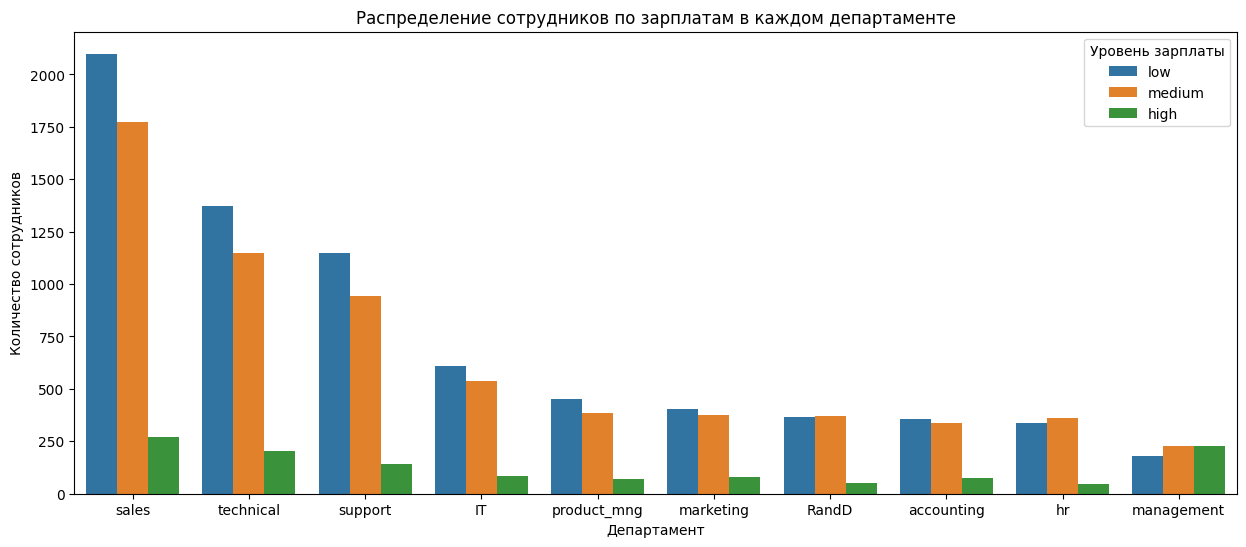

In [13]:
plt.figure(figsize=(15, 6))
sns.countplot(x='department', hue='salary', data=df, order=df['department'].value_counts().index)
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.legend(title='Уровень зарплаты')

### №7
Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [15]:
alpha = 0.05

**H0:** Средние значения времени двух групп сотрудников равны.

**H1:** Существует статистически значимая разница между средними значениями двух групп.

In [16]:
# Разделение DataFrame на две группы: сотрудники с высоким и низким окладом
high_salary_group = df[df['salary'] == 'high']
low_salary_group = df[df['salary'] == 'low']

#  t-тест
t_statistic, p_value = ttest_ind(high_salary_group['average_montly_hours'], low_salary_group['average_montly_hours'])

# Вывод результатов теста
print(f'T-статистика: {t_statistic}')
print(f'p-значение: {p_value}')

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимая разница.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу: разницы нет.")

T-статистика: -0.7288680398062308
p-значение: 0.4661023478267259
Нет оснований отвергнуть нулевую гипотезу: разницы нет.


### №8
Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [17]:
# Доля сотрудников с повышением среди уволившихся
promotion_rate_left = df[df['left'] == 1]['promotion_last_5years'].mean()
print(round(promotion_rate_left*100, 2))
# Доля сотрудников с повышением среди не уволившихся
promotion_rate_not_left = df[df['left'] == 0]['promotion_last_5years'].mean()
print(round(promotion_rate_not_left*100, 2))

0.53
2.63


In [18]:
# Средняя степень удовлетворенности среди уволившихся
satisfaction_mean_left = df[df['left'] == 1]['satisfaction_level'].mean()
print(round(satisfaction_mean_left, 2))
# Средняя степень удовлетворенности среди не уволившихся
satisfaction_mean_not_left = df[df['left'] == 0]['satisfaction_level'].mean()
print(round(satisfaction_mean_not_left, 2))

0.44
0.67


In [ ]:
# Среднее количество проектов среди уволившихся
projects_mean_left = df[df['left'] == 1]['number_project'].mean()
print(round(projects_mean_left, 2))
# Среднее количество проектов среди не уволившихся
projects_mean_not_left = df[df['left'] == 0]['number_project'].mean()
print(round(projects_mean_not_left, 2))

###№9
Разделить данные на тестовую и обучающую выборки

Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

Оценить качество модели на тестовой выборки

In [ ]:
# Удаление ненужных столбцов (department и salary)
df_for_lda = df.drop(['department', 'salary'], axis=1)

# разделяем выборку на тренировочную и тестовую
X = df_for_lda.drop('left', axis=1)
y = df_for_lda['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем модель
lda.fit(X_train, y_train)

In [ ]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
# нашел функцию тут - https://habr.com/ru/companies/ods/articles/328372/

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Нормализованная confusion matrix")
    else:
        print('Confusion matrix, без нормализации')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix')